Getting a random word from the wordlist
Running a quantum circuit to generate a random number


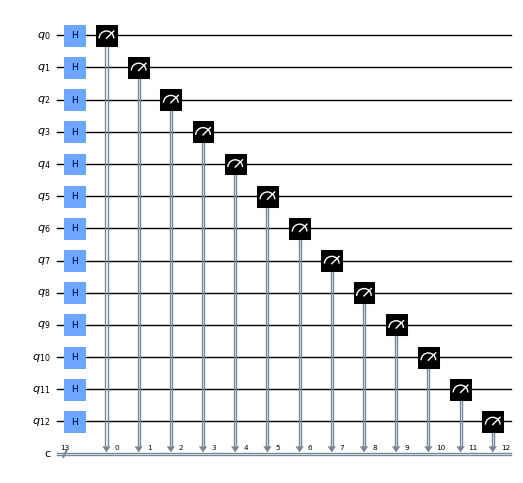

Selected word #6491 from the wordlist
Building a quantum circuit based on the selected word
Running 1 query on quantum circuit to obtain result


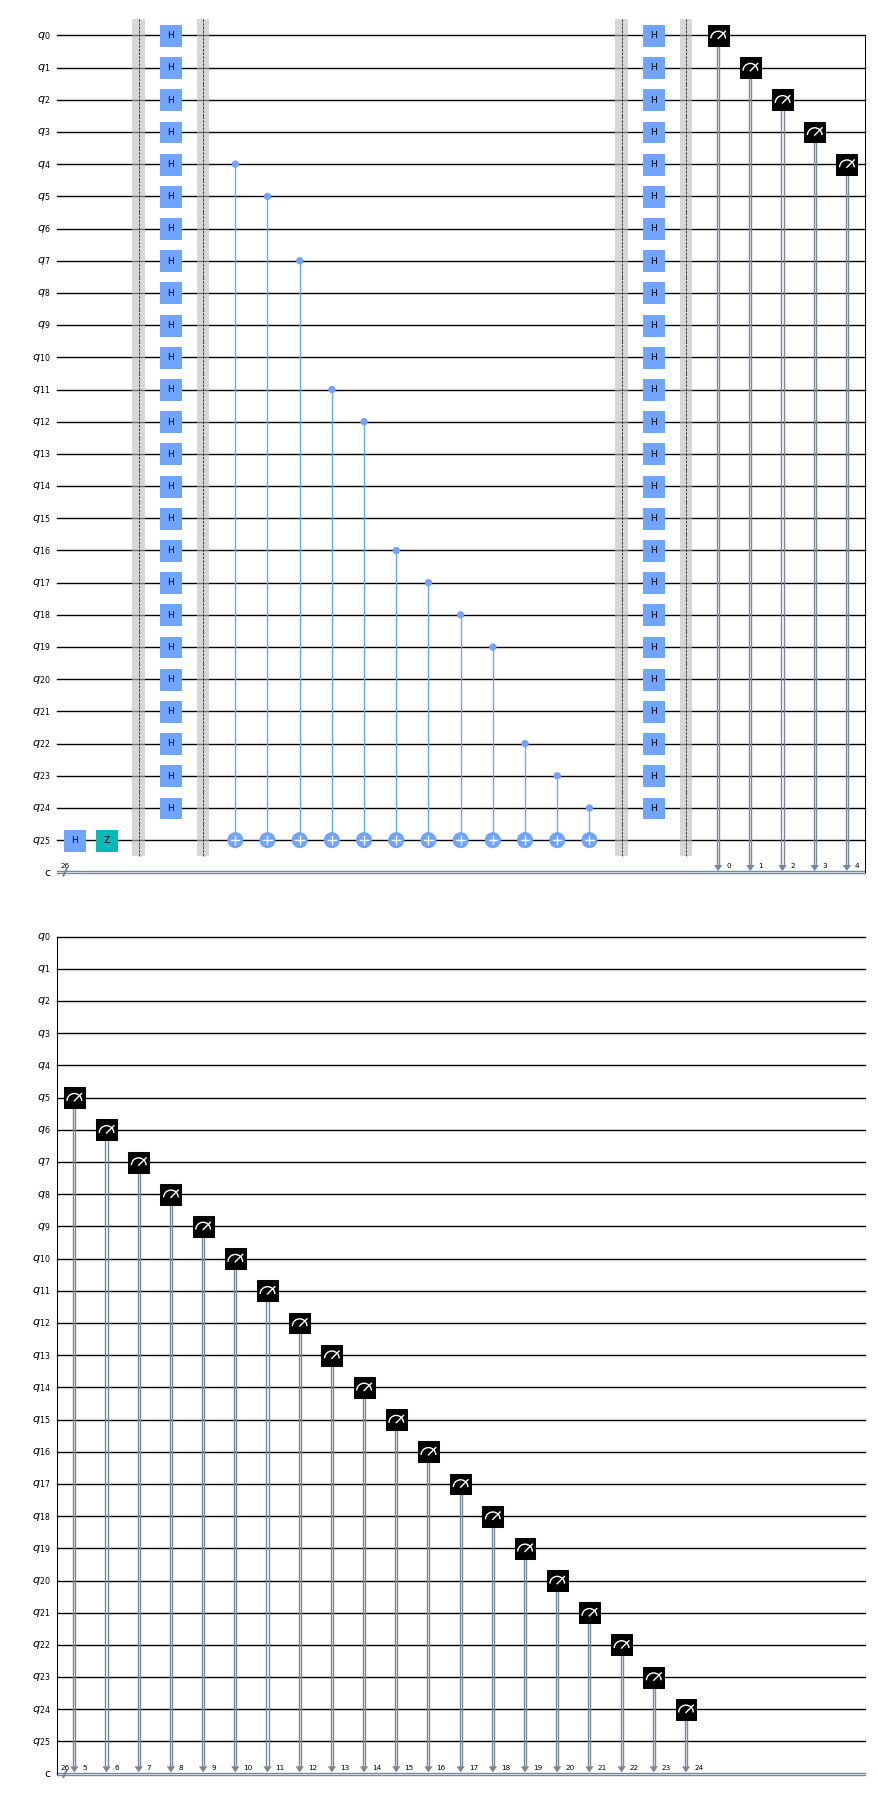

Used 1 query to get answer: BUMPH


In [10]:
#==============================================================================
#IMPORTS
import qiskit
import qiskit_ibm_provider
import linecache

#==============================================================================
#CONFIG
mode = 'draw' #Options are 'simulator', 'draw', and 'quantum'

#==============================================================================
#FUNCTIONS
def getRandomWordleWord():
    print('Getting a random word from the wordlist')
    #Define registers and circuit
    qr_rw = qiskit.QuantumRegister(13, 'q')
    cr_rw = qiskit.ClassicalRegister(13, 'c')
    circ_rw = qiskit.QuantumCircuit(qr_rw, cr_rw)
    #Build circuit to generate random 13-bit number
    for q in range(13):
        circ_rw.h(qr_rw[q])
        circ_rw.measure(qr_rw[q],cr_rw[q])
    #Run the circuit and fetch the results
    print('Running a quantum circuit to generate a random number')
    executionResult = executeCircuit(circ_rw,mode,1)
    counts=executionResult.get_counts(circ_rw)
    #Convert binary result to integer
    for key in counts:
        randNum = int(key,2)
    #Get input word (select random word from wordle list) 
    randWord = linecache.getline('./words.txt', randNum).rstrip('\n')
    randWord = randWord.upper()
    print('Selected word #' + str(randNum) + ' from the wordlist')
    return randWord

def executeCircuit(circToExec, mode, shots):
    provider = qiskit_ibm_provider.IBMProvider()
    if mode == 'simulator':
        backend = provider.get_backend("ibmq_qasm_simulator")
        job=qiskit.execute(circToExec,backend,shots=shots)
        result=job.result()
    elif mode == 'quantum':
        print('Error: no quantum computers with sufficient size (26-qubits) available.')
        #backend = provider.get_backend("")
        #job=qiskit.execute(circToExec,backend,shots=shots)
        #result=job.result()
    elif mode == 'draw':
        display(circToExec.draw(output='mpl', scale=0.5))
        backend = provider.get_backend("ibmq_qasm_simulator")
        job=qiskit.execute(circToExec,backend,shots=shots)
        result=job.result()
    else:
        print('Error: execution mode not specified in function executeCircuit().')
    return result

def convertWordToBinary(wordToConvert):
    #Convert word to ASCII codes in decimal
    wordDecAscii = list(word.encode('ascii'))
    #Convert ASCII decimal into binary
    wordBinAscii = ''
    for i in wordDecAscii:
        #Optimize to 5-bit binary by subtracting 65 (A: 65->0, Z: 90->25)
        wordBinAscii += bin(i-65)[2:].zfill(5)
    return wordBinAscii

def convertBinaryToWord(binaryToConvert):
    convertedWord = ''
    for position in range(0,25,5):
        #Reverse the optimization from 5-bit binary by adding 65 (A: 0->65, Z: 25->90)
        convertedWord += chr(int(binaryToConvert[position:position+5],2)+65)
    return convertedWord
    
def buildBernVazCircuit(secretCode, length):
    #Define registers and circuit
    qr_bv = qiskit.QuantumRegister(length+1, 'q')
    cr_bv = qiskit.ClassicalRegister(length+1, 'c')
    circ_bv = qiskit.QuantumCircuit(qr_bv, cr_bv)
    #Add a H and Z gate to last qubit to enable phase kickback
    circ_bv.h(qr_bv[length])
    circ_bv.z(qr_bv[length])
    circ_bv.barrier(qr_bv)
    #Add Hadamard gates to input qubits
    for q in range(length):
        circ_bv.h(qr_bv[q])
    circ_bv.barrier(qr_bv)
    #Add CNOT gate for each 1 in the code
    i=0 
    for b in secretCode:
        if b == '1':
            circ_bv.cnot(qr_bv[i],qr_bv[length])
        i += 1
    circ_bv.barrier(qr_bv)
    #Add Hadamard gates to input qubits
    for q in range(length):
        circ_bv.h(qr_bv[q])  
    circ_bv.barrier(qr_bv)
    for q in range(length):
        circ_bv.measure(qr_bv[q],cr_bv[q])
    return circ_bv


#==============================================================================
#MAIN PROGRAM FLOW

#1. Get a random word
word = getRandomWordleWord()

#2. Convert random word into binary
wordBinary = convertWordToBinary(word)

#3. Build a BernVaz circuit based on the word
print('Building a quantum circuit based on the selected word')
circBernVaz = buildBernVazCircuit(wordBinary,len(wordBinary))

#4. Execute the BernVaz circuit and fetch the results
print('Running 1 query on quantum circuit to obtain result')
decodeResult = executeCircuit(circBernVaz,mode,1)
counts = decodeResult.get_counts(circBernVaz)

#5. Reverse the ordering of the result from QisKit bit ordering
answerBinary = ''
for key in counts:
    answerBinary += key[::-1]

#6. Convert binary answer back into a word
answerWord = convertBinaryToWord(answerBinary)
print('Used 1 query to get answer: ' + answerWord)